# MTA_EDA_Project1 

In [1]:
import pandas as pd #import pandas  as pd for sort data 
import datetime  #for sort data by date and time
import matplotlib.pyplot as plt #to plot data 
import numpy as np
from sqlalchemy import create_engine
import seaborn as sns #to plot 
%matplotlib inline 

### if you want to run code remove hash below
* the cell below is for download the date set from MTA website

In [2]:
def Data(week_numbers):
    URL = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    Data = []
    for week_number in week_numbers:
        file = URL.format(week_number)
        Data.append(pd.read_csv(file))
    return pd.concat(Data)
 
week_numbers = [210501,210508,210515,210522,210529,210605,210612,210619,210626,210703
                ,210710,210717,210724,210731,210807]
Data_DB = Data(week_numbers)

Create database in sqlite and upload file to sql and read it from sql again as dataframe

In [3]:
engine = create_engine("sqlite:///DB_MTA.db") #to create database

* below cell is to write dateset into database.

NOTE: I added database with empty data but you can run code in python and it will write into database,

to add table you can remove the hash below to write

In [4]:
#Data_DB.to_sql("DATA",engine,if_exists="append",index=False) 

In [5]:
Data_df= pd.read_sql("SELECT * FROM DATA;",engine) #to read from database to dataframe
Data_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,00:00:00,REGULAR,7561288,2582898
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,04:00:00,REGULAR,7561295,2582903
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,08:00:00,REGULAR,7561302,2582918
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,12:00:00,REGULAR,7561336,2582977
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,16:00:00,REGULAR,7561426,2583008
...,...,...,...,...,...,...,...,...,...,...,...
3140289,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/06/2021,05:00:00,REGULAR,5554,593
3140290,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/06/2021,09:00:00,REGULAR,5554,593
3140291,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/06/2021,13:00:00,REGULAR,5554,593
3140292,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/06/2021,17:00:00,REGULAR,5554,593


#### Data cleaning 
* cleaning data and remove space in columns 
* drop duplicates 


In [6]:
Data_df.columns = [column.strip() for column in Data_df.columns] # strip space in columns 
Data_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [7]:
Data_df["DATE_TIME"]= pd.to_datetime(Data_df.DATE+' '+Data_df.TIME)

In [8]:
(Data_df.groupby(["C/A","UNIT","SCP","STATION","DIVISION","DATE","TIME"]).ENTRIES.count().reset_index()
 .sort_values("ENTRIES",ascending=False))
#to check duplicate rows

,C/A,UNIT,SCP,STATION,DIVISION,DATE,TIME,ENTRIES
2824615,R514,R094,00-05-00,ASTORIA BLVD,BMT,07/22/2021,04:00:00,2
267495,B024,R211,00-05-00,KINGS HWY,BMT,05/02/2021,16:00:00,2
267502,B024,R211,00-05-00,KINGS HWY,BMT,05/03/2021,20:00:00,2
267501,B024,R211,00-05-00,KINGS HWY,BMT,05/03/2021,16:00:00,2
267500,B024,R211,00-05-00,KINGS HWY,BMT,05/03/2021,12:00:00,2
...,...,...,...,...,...,...,...,...
1046772,N128,R200,00-00-01,EUCLID AV,IND,06/06/2021,04:00:00,1
1046773,N128,R200,00-00-01,EUCLID AV,IND,06/06/2021,08:00:00,1
1046774,N128,R200,00-00-01,EUCLID AV,IND,06/06/2021,12:00:00,1
1046775,N128,R200,00-00-01,EUCLID AV,IND,06/06/2021,16:00:00,1


In [9]:
Data_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE","TIME"],inplace=True, ascending=False)
Data_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE","TIME"], inplace=True)
Data_df
#drop_duplicates

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
3140293,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/06/2021,21:00:00,REGULAR,5554,593,2021-08-06 21:00:00
3140292,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/06/2021,17:00:00,REGULAR,5554,593,2021-08-06 17:00:00
3140291,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/06/2021,13:00:00,REGULAR,5554,593,2021-08-06 13:00:00
3140290,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/06/2021,09:00:00,REGULAR,5554,593,2021-08-06 09:00:00
3140289,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/06/2021,05:00:00,REGULAR,5554,593,2021-08-06 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,16:00:00,REGULAR,7561426,2583008,2021-04-24 16:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,12:00:00,REGULAR,7561336,2582977,2021-04-24 12:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,08:00:00,REGULAR,7561302,2582918,2021-04-24 08:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,04:00:00,REGULAR,7561295,2582903,2021-04-24 04:00:00


In [10]:
Data_df["WEEKDAY"]=Data_df["DATE_TIME"].dt.weekday
Data_df
#add columns weekday 

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,WEEKDAY
3140293,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/06/2021,21:00:00,REGULAR,5554,593,2021-08-06 21:00:00,4
3140292,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/06/2021,17:00:00,REGULAR,5554,593,2021-08-06 17:00:00,4
3140291,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/06/2021,13:00:00,REGULAR,5554,593,2021-08-06 13:00:00,4
3140290,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/06/2021,09:00:00,REGULAR,5554,593,2021-08-06 09:00:00,4
3140289,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/06/2021,05:00:00,REGULAR,5554,593,2021-08-06 05:00:00,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,16:00:00,REGULAR,7561426,2583008,2021-04-24 16:00:00,5
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,12:00:00,REGULAR,7561336,2582977,2021-04-24 12:00:00,5
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,08:00:00,REGULAR,7561302,2582918,2021-04-24 08:00:00,5
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,04:00:00,REGULAR,7561295,2582903,2021-04-24 04:00:00,5


### sort data 
* Groupby data by time to know entry for each station per time 


In [11]:
Data_time = (Data_df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE","TIME"],
                               as_index=False).ENTRIES.first()) # groupby time 

In [12]:
Data_time["Daily_ENTRIES_T"]=Data_time.groupby(["C/A", "UNIT", "SCP", "STATION"])[["ENTRIES"]].diff()
#find difference between entries per time 

In [13]:
Data_time.dropna(subset=["Daily_ENTRIES_T"], axis=0, inplace = True) #drop NaN

In [14]:
Data_df.TIME=pd.to_datetime(Data_df.TIME) #change to datatime 

In [15]:
Data_time["Daily_fixed"]=(np.where(((Data_time.ENTRIES ==0) & (Data_time.Daily_ENTRIES_T < 0)),0,
                           np.where((Data_time.ENTRIES !=0) & (Data_time.Daily_ENTRIES_T < 0)
                           ,abs(Data_time.Daily_ENTRIES_T),Data_time.Daily_ENTRIES_T)))
Data_time.reset_index()
# find values =0 for ENTRIES and Daily_ENTRIES_T < 0 put it 0 and for ENTRIES !=0 and Daily_ENTRIES_T < 0 
# replace it with abs values

,index,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,Daily_ENTRIES_T,Daily_fixed
0,1,A002,R051,02-00-00,59 ST,04/24/2021,04:00:00,7561295,7.0,7.0
1,2,A002,R051,02-00-00,59 ST,04/24/2021,08:00:00,7561302,7.0,7.0
2,3,A002,R051,02-00-00,59 ST,04/24/2021,12:00:00,7561336,34.0,34.0
3,4,A002,R051,02-00-00,59 ST,04/24/2021,16:00:00,7561426,90.0,90.0
4,5,A002,R051,02-00-00,59 ST,04/24/2021,20:00:00,7561578,152.0,152.0
...,...,...,...,...,...,...,...,...,...,...
3135208,3140239,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/06/2021,05:00:00,5554,0.0,0.0
3135209,3140240,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/06/2021,09:00:00,5554,0.0,0.0
3135210,3140241,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/06/2021,13:00:00,5554,0.0,0.0
3135211,3140242,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/06/2021,17:00:00,5554,0.0,0.0


* Groupby data by Date to know entry for each station per day

In [16]:
Data_Day= (Data_df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE","WEEKDAY"],
                           as_index=False).ENTRIES.first()) #same as above but per day 

In [17]:
Data_Day["Daily_ENTRIES_D"]=Data_Day.groupby(["C/A", "UNIT", "SCP", "STATION"])[["ENTRIES"]].diff()

In [18]:
Data_Day.dropna(subset=["Daily_ENTRIES_D"], axis=0, inplace = True)

In [19]:
Data_Day["Daily_fixed"]=(np.where(((Data_Day.ENTRIES ==0) & (Data_Day.Daily_ENTRIES_D < 0)),0,
                          np.where((Data_Day.ENTRIES !=0) & (Data_Day.Daily_ENTRIES_D < 0)
                          ,abs(Data_Day.Daily_ENTRIES_D),Data_Day.Daily_ENTRIES_D)))
Data_Day

,C/A,UNIT,SCP,STATION,DATE,WEEKDAY,ENTRIES,Daily_ENTRIES_D,Daily_fixed
1,A002,R051,02-00-00,59 ST,04/25/2021,6,7561843,265.0,265.0
2,A002,R051,02-00-00,59 ST,04/26/2021,0,7562300,457.0,457.0
3,A002,R051,02-00-00,59 ST,04/27/2021,1,7562873,573.0,573.0
4,A002,R051,02-00-00,59 ST,04/28/2021,2,7563448,575.0,575.0
5,A002,R051,02-00-00,59 ST,04/29/2021,3,7563968,520.0,520.0
...,...,...,...,...,...,...,...,...,...
524307,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/02/2021,0,5554,0.0,0.0
524308,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/03/2021,1,5554,0.0,0.0
524309,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/04/2021,2,5554,0.0,0.0
524310,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/05/2021,3,5554,0.0,0.0


* check missing values in data by choose randomly for some station

In [20]:
mask = (
        (Data_time["C/A"] == "A050") &
        (Data_time["UNIT"] == "R088") & 
        (Data_time["SCP"]== "00-05-01")&
        (Data_time["STATION"] == "CORTLANDT ST")&
        (Data_time["DATE"]=="06/15/2021"))
missing_v1=Data_time[mask]

missing_v1.reset_index()

#to draw missing 

,index,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,Daily_ENTRIES_T,Daily_fixed
0,144333,A050,R088,00-05-01,CORTLANDT ST,06/15/2021,01:00:00,13122,5.0,5.0
1,144334,A050,R088,00-05-01,CORTLANDT ST,06/15/2021,05:00:00,13122,0.0,0.0
2,144335,A050,R088,00-05-01,CORTLANDT ST,06/15/2021,09:00:00,13125,3.0,3.0
3,144336,A050,R088,00-05-01,CORTLANDT ST,06/15/2021,21:00:00,44,-13081.0,13081.0


In [21]:
mask = (
        (Data_time["C/A"] == "A050") &
        (Data_time["UNIT"] == "R088") & 
        (Data_time["SCP"]== "00-05-01")&
        (Data_time["STATION"] == "CORTLANDT ST")&
        (Data_time["DATE"]=="06/16/2021"))
missing_v2=Data_time[mask]
missing_v2.reset_index()

,index,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,Daily_ENTRIES_T,Daily_fixed
0,144337,A050,R088,00-05-01,CORTLANDT ST,06/16/2021,01:00:00,51,7.0,7.0
1,144338,A050,R088,00-05-01,CORTLANDT ST,06/16/2021,05:00:00,51,0.0,0.0
2,144339,A050,R088,00-05-01,CORTLANDT ST,06/16/2021,09:00:00,55,4.0,4.0
3,144340,A050,R088,00-05-01,CORTLANDT ST,06/16/2021,13:00:00,94,39.0,39.0
4,144341,A050,R088,00-05-01,CORTLANDT ST,06/16/2021,17:00:00,148,54.0,54.0
5,144342,A050,R088,00-05-01,CORTLANDT ST,06/16/2021,21:00:00,180,32.0,32.0


* Check values not equale 0 and bigeer than 0 

In [22]:
df=Data_Day[((Data_Day.ENTRIES !=0) & (Data_Day.Daily_ENTRIES_D > 0))]
df

,C/A,UNIT,SCP,STATION,DATE,WEEKDAY,ENTRIES,Daily_ENTRIES_D,Daily_fixed
1,A002,R051,02-00-00,59 ST,04/25/2021,6,7561843,265.0,265.0
2,A002,R051,02-00-00,59 ST,04/26/2021,0,7562300,457.0,457.0
3,A002,R051,02-00-00,59 ST,04/27/2021,1,7562873,573.0,573.0
4,A002,R051,02-00-00,59 ST,04/28/2021,2,7563448,575.0,575.0
5,A002,R051,02-00-00,59 ST,04/29/2021,3,7563968,520.0,520.0
...,...,...,...,...,...,...,...,...,...
524127,TRAM2,R469,00-05-00,RIT-ROOSEVELT,05/19/2021,2,3249,4.0,4.0
524128,TRAM2,R469,00-05-00,RIT-ROOSEVELT,05/20/2021,3,3253,4.0,4.0
524129,TRAM2,R469,00-05-00,RIT-ROOSEVELT,05/21/2021,4,3258,5.0,5.0
524130,TRAM2,R469,00-05-00,RIT-ROOSEVELT,05/22/2021,5,262149,258891.0,258891.0


* I assumed that the data with more than 5000k entries is correct because if we put it 10k the difference will be 3 rows

In [23]:
Data_5=(df[df.Daily_fixed<5000])

Data_5["DATE_DT"]= pd.to_datetime(Data_5["DATE"])
Data_5.sort_values("Daily_fixed",ascending=False)

<ipython-input-23-422ce960ef2c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_5["DATE_DT"]= pd.to_datetime(Data_5["DATE"])


,C/A,UNIT,SCP,STATION,DATE,WEEKDAY,ENTRIES,Daily_ENTRIES_D,Daily_fixed,DATE_DT
374607,R182,R035,00-05-01,168 ST,07/10/2021,5,318891,4914.0,4914.0,2021-07-10
374504,R182,R035,00-05-00,168 ST,07/10/2021,5,608380,4571.0,4571.0,2021-07-10
476139,R521,R327,00-00-00,52 ST,07/24/2021,5,4576363,4367.0,4367.0,2021-07-24
374401,R182,R035,00-03-02,168 ST,07/10/2021,5,519552,4186.0,4186.0,2021-07-10
285968,N606,R025,00-00-07,JAMAICA CENTER,04/30/2021,4,29287373,4064.0,4064.0,2021-04-30
...,...,...,...,...,...,...,...,...,...,...
456764,R414,R162,00-05-00,ELDER AV,07/30/2021,4,262472,1.0,1.0,2021-07-30
456753,R414,R162,00-05-00,ELDER AV,07/19/2021,0,262464,1.0,1.0,2021-07-19
148931,N083,R138,01-05-00,W 4 ST-WASH SQ,06/25/2021,4,67,1.0,1.0,2021-06-25
456739,R414,R162,00-05-00,ELDER AV,07/05/2021,0,262463,1.0,1.0,2021-07-05


In [24]:
Data_5["WEEK"]=Data_5.DATE_DT.dt.week
Data_5.reset_index()

<ipython-input-24-43a8e3613e7f>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  Data_5["WEEK"]=Data_5.DATE_DT.dt.week
<ipython-input-24-43a8e3613e7f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_5["WEEK"]=Data_5.DATE_DT.dt.week


,index,C/A,UNIT,SCP,STATION,DATE,WEEKDAY,ENTRIES,Daily_ENTRIES_D,Daily_fixed,DATE_DT,WEEK
0,1,A002,R051,02-00-00,59 ST,04/25/2021,6,7561843,265.0,265.0,2021-04-25,16
1,2,A002,R051,02-00-00,59 ST,04/26/2021,0,7562300,457.0,457.0,2021-04-26,17
2,3,A002,R051,02-00-00,59 ST,04/27/2021,1,7562873,573.0,573.0,2021-04-27,17
3,4,A002,R051,02-00-00,59 ST,04/28/2021,2,7563448,575.0,575.0,2021-04-28,17
4,5,A002,R051,02-00-00,59 ST,04/29/2021,3,7563968,520.0,520.0,2021-04-29,17
...,...,...,...,...,...,...,...,...,...,...,...,...
458177,524125,TRAM2,R469,00-05-00,RIT-ROOSEVELT,05/17/2021,0,3242,2.0,2.0,2021-05-17,20
458178,524126,TRAM2,R469,00-05-00,RIT-ROOSEVELT,05/18/2021,1,3245,3.0,3.0,2021-05-18,20
458179,524127,TRAM2,R469,00-05-00,RIT-ROOSEVELT,05/19/2021,2,3249,4.0,4.0,2021-05-19,20
458180,524128,TRAM2,R469,00-05-00,RIT-ROOSEVELT,05/20/2021,3,3253,4.0,4.0,2021-05-20,20


* here to know the sum of entry every week 

In [25]:
Data_weekly=Data_5.groupby(["STATION","WEEK"]).Daily_fixed.sum().reset_index().sort_values("Daily_fixed",ascending=False)
Data_weekly=Data_weekly.head(14).reset_index()
Data_weekly.sort_values("WEEK",ascending=True)

,index,STATION,WEEK,Daily_fixed
13,978,34 ST-PENN STA,18,241225.0
11,979,34 ST-PENN STA,19,252480.0
10,980,34 ST-PENN STA,20,260646.0
9,981,34 ST-PENN STA,21,264666.0
8,982,34 ST-PENN STA,22,268794.0
7,983,34 ST-PENN STA,23,291849.0
4,984,34 ST-PENN STA,24,307921.0
1,985,34 ST-PENN STA,25,319520.0
5,986,34 ST-PENN STA,26,298598.0
6,987,34 ST-PENN STA,27,298089.0


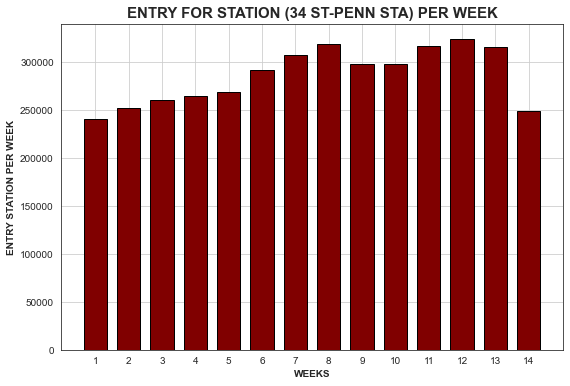

In [43]:
plt.figure(figsize = [9,6])

plt.grid()
sns.set_style("white")

plt.xticks([18,19,20,21,22,23,24,25,26,27,28,29,30,31],["1","2","3","4","5","6","7","8","9","10","11","12","13","14"])
plt.xlabel("WEEKS",fontsize = 10, weight = 'bold')
plt.ylabel('ENTRY STATION PER WEEK',fontsize = 10, weight = 'bold')
plt.title("ENTRY FOR STATION (34 ST-PENN STA) PER WEEK",fontsize = 15, weight = 'bold')
plt.bar(Data_weekly['WEEK'],Data_weekly["Daily_fixed"],width = 0.7,color=("maroon"),edgecolor='black');




* in chart below represent BEHAVIOR OF CORTLANDT ST STATION and to know missing values

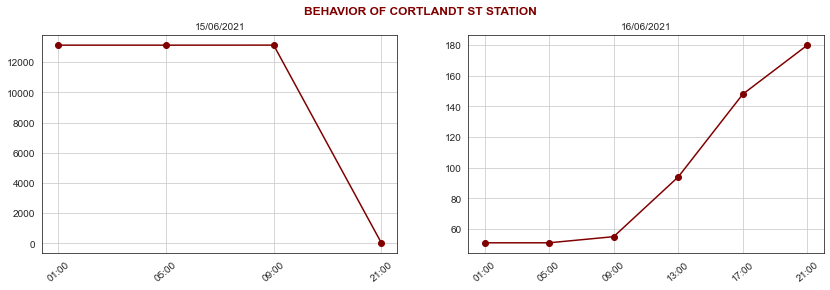

In [27]:
plt.figure(figsize = [14,4])
plt.suptitle('BEHAVIOR OF CORTLANDT ST STATION',fontsize = 12,weight = 'bold',c="maroon")
plt.subplot(1,2,1)
plt.plot(missing_v1["TIME"],(missing_v1["ENTRIES"]),"ko",linestyle="-",c="maroon")
plt.grid()
plt.xticks(rotation=40)
plt.xticks(["01:00:00","05:00:00","09:00:00",
          "21:00:00"],
           ["01:00","05:00","09:00","21:00"])
plt.title('15/06/2021',fontsize=10);

plt.subplot(1,2,2)
plt.plot(missing_v2["TIME"],(missing_v2["ENTRIES"]),"ko",linestyle="-",c="maroon")
plt.xticks(["01:00:00","05:00:00","09:00:00",
            "13:00:00","17:00:00","21:00:00"],
           ["01:00","05:00","09:00","13:00","17:00","21:00"])



plt.title('16/06/2021',fontsize=10);


plt.xticks(rotation=40)

plt.grid()

sns.set_style("white")


* In the cell below is to find out the TOP 15 stations by sum entry to the station for 14 weeks
* The chart below will show you the top 15

In [28]:
top15=Data_5.groupby("STATION").Daily_fixed.sum().reset_index().sort_values("Daily_fixed",ascending=False).head(15)
top15

,STATION,Daily_fixed
61,34 ST-PENN STA,4263367.0
59,34 ST-HERALD SQ,3261307.0
233,GRD CNTRL-42 ST,3031108.0
110,86 ST,3000110.0
46,23 ST,2822396.0
14,14 ST-UNION SQ,2745879.0
9,125 ST,2696879.0
68,42 ST-PORT AUTH,2599203.0
353,TIMES SQ-42 ST,2372812.0
217,FLUSHING-MAIN,2371183.0


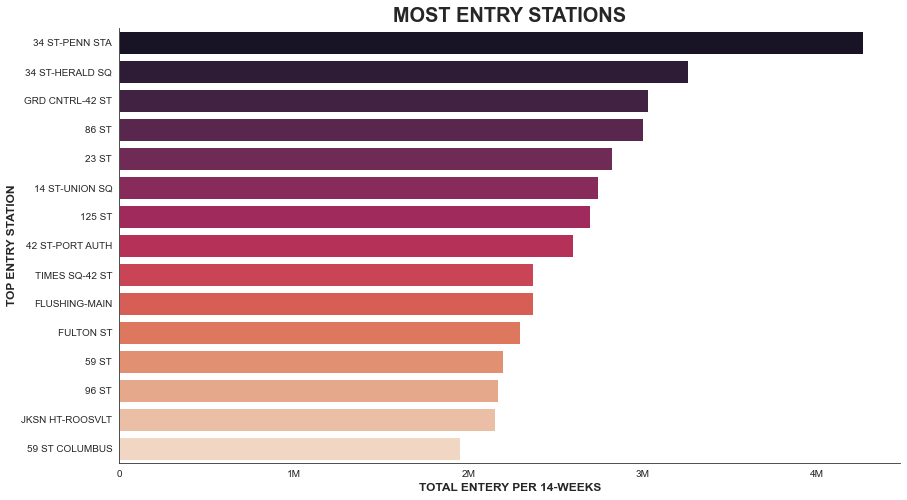

In [29]:
plt.figure(figsize = [14,8])

sns.barplot(x='Daily_fixed',y = 'STATION',data=top15,palette="rocket")
sns.despine()
plt.xlabel("TOTAL ENTERY PER 14-WEEKS",fontsize = 12, weight = 'bold')
plt.ylabel('TOP ENTRY STATION',fontsize = 12, weight = 'bold')
plt.xticks([0,1000000,2000000,3000000,4000000],["0","1M","2M","3M","4M"])
plt.title("MOST ENTRY STATIONS",fontsize = 20, weight = 'bold')
sns.despine()
sns.set_style("white")

here to insert now column WEEK  

In [30]:
Data_Day["DATE_DT"] = pd.to_datetime(Data_Day["DATE"])
Data_Day["WEEK"]=Data_Day.DATE_DT.dt.week
Data_Day

<ipython-input-30-826e04e92716>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  Data_Day["WEEK"]=Data_Day.DATE_DT.dt.week


,C/A,UNIT,SCP,STATION,DATE,WEEKDAY,ENTRIES,Daily_ENTRIES_D,Daily_fixed,DATE_DT,WEEK
1,A002,R051,02-00-00,59 ST,04/25/2021,6,7561843,265.0,265.0,2021-04-25,16
2,A002,R051,02-00-00,59 ST,04/26/2021,0,7562300,457.0,457.0,2021-04-26,17
3,A002,R051,02-00-00,59 ST,04/27/2021,1,7562873,573.0,573.0,2021-04-27,17
4,A002,R051,02-00-00,59 ST,04/28/2021,2,7563448,575.0,575.0,2021-04-28,17
5,A002,R051,02-00-00,59 ST,04/29/2021,3,7563968,520.0,520.0,2021-04-29,17
...,...,...,...,...,...,...,...,...,...,...,...
524307,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/02/2021,0,5554,0.0,0.0,2021-08-02,31
524308,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/03/2021,1,5554,0.0,0.0,2021-08-03,31
524309,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/04/2021,2,5554,0.0,0.0,2021-08-04,31
524310,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/05/2021,3,5554,0.0,0.0,2021-08-05,31


* here to show the behavior for top 1 station 

In [31]:
mask = ((Data_Day["C/A"] == "N067") &
        (Data_Day["UNIT"] == "R012") &
        (Data_Day["STATION"] == "34 ST-PENN STA")
        )

ST_34=Data_Day[mask]
ST_34.sort_values("Daily_fixed",ascending=False)


,C/A,UNIT,SCP,STATION,DATE,WEEKDAY,ENTRIES,Daily_ENTRIES_D,Daily_fixed,DATE_DT,WEEK
138768,N067,R012,00-00-03,34 ST-PENN STA,07/23/2021,4,87161,1398.0,1398.0,2021-07-23,29
138764,N067,R012,00-00-03,34 ST-PENN STA,07/19/2021,0,81773,1366.0,1366.0,2021-07-19,29
138767,N067,R012,00-00-03,34 ST-PENN STA,07/22/2021,3,85763,1362.0,1362.0,2021-07-22,29
138765,N067,R012,00-00-03,34 ST-PENN STA,07/20/2021,1,83095,1322.0,1322.0,2021-07-20,29
138766,N067,R012,00-00-03,34 ST-PENN STA,07/21/2021,2,84401,1306.0,1306.0,2021-07-21,29
...,...,...,...,...,...,...,...,...,...,...,...
139839,N067,R012,00-06-01,34 ST-PENN STA,04/30/2021,4,458752,0.0,0.0,2021-04-30,17
139840,N067,R012,00-06-01,34 ST-PENN STA,05/01/2021,5,458752,0.0,0.0,2021-05-01,17
139841,N067,R012,00-06-01,34 ST-PENN STA,05/02/2021,6,458752,0.0,0.0,2021-05-02,17
139842,N067,R012,00-06-01,34 ST-PENN STA,05/03/2021,0,458752,0.0,0.0,2021-05-03,18


In [32]:
mask = ((ST_34["C/A"] == "N067") &
        (ST_34["UNIT"] == "R012") & 
        (ST_34["STATION"] == "34 ST-PENN STA")&
         (ST_34["WEEK"] == 29)
      )

ST_34[mask]

,C/A,UNIT,SCP,STATION,DATE,WEEKDAY,ENTRIES,Daily_ENTRIES_D,Daily_fixed,DATE_DT,WEEK
138449,N067,R012,00-00-00,34 ST-PENN STA,07/19/2021,0,268313,409.0,409.0,2021-07-19,29
138450,N067,R012,00-00-00,34 ST-PENN STA,07/20/2021,1,268706,393.0,393.0,2021-07-20,29
138451,N067,R012,00-00-00,34 ST-PENN STA,07/21/2021,2,269103,397.0,397.0,2021-07-21,29
138452,N067,R012,00-00-00,34 ST-PENN STA,07/22/2021,3,269486,383.0,383.0,2021-07-22,29
138453,N067,R012,00-00-00,34 ST-PENN STA,07/23/2021,4,269935,449.0,449.0,2021-07-23,29
...,...,...,...,...,...,...,...,...,...,...,...
139921,N067,R012,00-06-01,34 ST-PENN STA,07/21/2021,2,458752,0.0,0.0,2021-07-21,29
139922,N067,R012,00-06-01,34 ST-PENN STA,07/22/2021,3,458752,0.0,0.0,2021-07-22,29
139923,N067,R012,00-06-01,34 ST-PENN STA,07/23/2021,4,458752,0.0,0.0,2021-07-23,29
139924,N067,R012,00-06-01,34 ST-PENN STA,07/24/2021,5,458752,0.0,0.0,2021-07-24,29


* here to show the behavior for top 1 station for 14 weeks and plot it

In [33]:
ST_14_week=ST_34.groupby(["DATE_DT","STATION",])[["Daily_fixed"]].sum()
ST_14_week.reset_index(inplace=True)
ST_14_week["WEEK"]=ST_14_week.DATE_DT.dt.week
ST_14_week.reset_index(inplace=True)


<ipython-input-33-6610e66d8a4a>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  ST_14_week["WEEK"]=ST_14_week.DATE_DT.dt.week


In [34]:
mask = (
        (ST_14_week["STATION"] == "34 ST-PENN STA")&
         (ST_14_week["WEEK"] >= 29)&
    (ST_14_week["WEEK"] <= 30)
    
      )
ST_two_week1=ST_14_week[mask]

Text(0.5, 1.0, 'ENTRY FOR 3 MONTHS (34 ST-PENN STA) STATION')

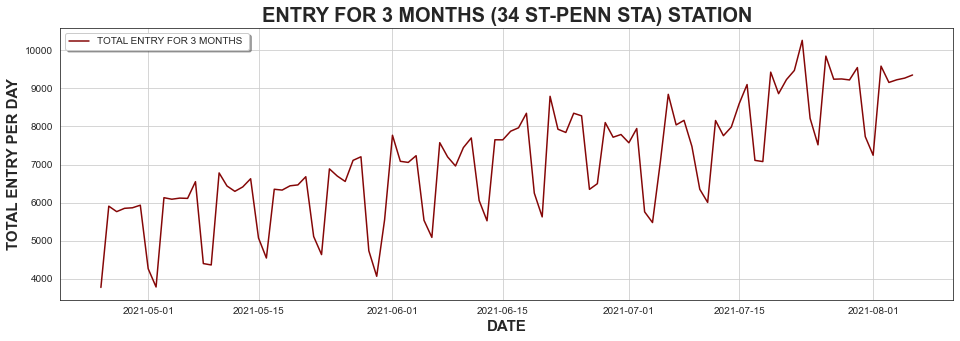

In [35]:
plt.figure(figsize = [16,5])
plt.plot(ST_14_week.DATE_DT,ST_14_week.Daily_fixed, color=("#850707"),linestyle="-")
plt.grid()
plt.legend(["TOTAL ENTRY FOR 3 MONTHS "],shadow = True, loc = 2);
plt.xlabel("DATE",fontsize = 15, weight = 'bold')
plt.ylabel('TOTAL ENTRY PER DAY',fontsize = 15, weight = 'bold')
plt.title("ENTRY FOR 3 MONTHS (34 ST-PENN STA) STATION",fontsize = 20, weight = 'bold')

In [36]:
ST_34perweek=ST_34.groupby(["WEEKDAY","STATION"])[["Daily_fixed"]].sum()
ST_34perweek.reset_index(inplace=True)
ST_34perweek

,WEEKDAY,STATION,Daily_fixed
0,0,34 ST-PENN STA,113819.0
1,1,34 ST-PENN STA,113445.0
2,2,34 ST-PENN STA,112551.0
3,3,34 ST-PENN STA,115075.0
4,4,34 ST-PENN STA,118242.0
5,5,34 ST-PENN STA,82928.0
6,6,34 ST-PENN STA,81209.0


* here to show the behavior for top 1 station for 2 weeks

(array([18827., 18829., 18831., 18833., 18835., 18837., 18839., 18840.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

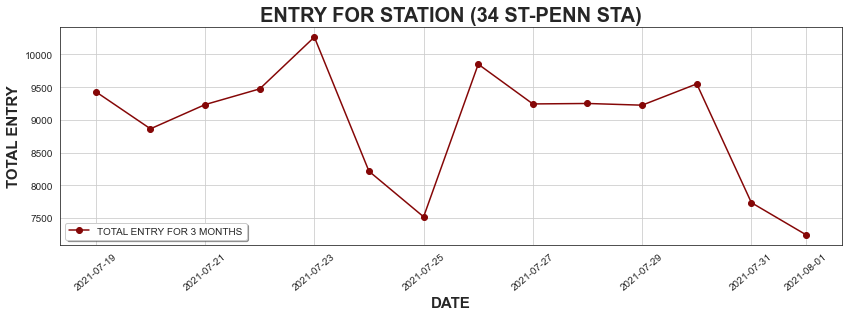

In [37]:
plt.figure(figsize = [14,4])


plt.plot(ST_two_week1.DATE_DT,ST_two_week1.Daily_fixed,"ko", color=("#850707"),linestyle="-")

plt.grid()
plt.legend(['TOTAL ENTRY FOR 3 MONTHS'],shadow = True, loc = 3);
plt.xlabel("DATE",fontsize = 15, weight = 'bold')
plt.ylabel('TOTAL ENTRY',fontsize = 15, weight = 'bold')
plt.title("ENTRY FOR STATION (34 ST-PENN STA)",fontsize = 20, weight = 'bold')
plt.xticks(rotation=40)

In [38]:
ST_34["WEEKDAY"]=Data_df["DATE_TIME"].dt.weekday

<ipython-input-38-2f7675c56aaf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ST_34["WEEKDAY"]=Data_df["DATE_TIME"].dt.weekday


In [39]:
mask = (
        (Data_df["STATION"] == "GRD CNTRL-42 ST")&
        (Data_df["DATE"]=="05/07/2021"))
#len(Data_df[mask])
Data_df[mask].tail(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,WEEKDAY
368753,R235,R045,01-00-00,GRD CNTRL-42 ST,4567S,IRT,05/07/2021,2021-09-10 17:00:00,REGULAR,70,443,2021-05-07 17:00:00,4
368752,R235,R045,01-00-00,GRD CNTRL-42 ST,4567S,IRT,05/07/2021,2021-09-10 13:00:00,REGULAR,70,441,2021-05-07 13:00:00,4
368751,R235,R045,01-00-00,GRD CNTRL-42 ST,4567S,IRT,05/07/2021,2021-09-10 09:00:00,REGULAR,70,440,2021-05-07 09:00:00,4
368750,R235,R045,01-00-00,GRD CNTRL-42 ST,4567S,IRT,05/07/2021,2021-09-10 05:00:00,REGULAR,70,437,2021-05-07 05:00:00,4
368749,R235,R045,01-00-00,GRD CNTRL-42 ST,4567S,IRT,05/07/2021,2021-09-10 01:00:00,REGULAR,70,437,2021-05-07 01:00:00,4


In [40]:
mask = ((Data_Day["C/A"] == "A015") &
        (Data_Day["UNIT"] == "R081") & 
        (Data_Day["STATION"] == "49 ST")&
        (Data_Day["SCP"] == "00-00-02")&
       (Data_Day["DATE_DT"].dt.month == 5)&
       (Data_Day["DATE_DT"].dt.day >=14)&
        (Data_Day["DATE_DT"].dt.day <=20))
test=Data_Day[mask]
test.reset_index()

,index,C/A,UNIT,SCP,STATION,DATE,WEEKDAY,ENTRIES,Daily_ENTRIES_D,Daily_fixed,DATE_DT,WEEK
0,6530,A015,R081,00-00-02,49 ST,05/14/2021,4,4340748,245.0,245.0,2021-05-14,19
1,6531,A015,R081,00-00-02,49 ST,05/15/2021,5,4340953,205.0,205.0,2021-05-15,19
2,6532,A015,R081,00-00-02,49 ST,05/16/2021,6,18,-4340935.0,4340935.0,2021-05-16,19
3,6533,A015,R081,00-00-02,49 ST,05/17/2021,0,205,187.0,187.0,2021-05-17,20
4,6534,A015,R081,00-00-02,49 ST,05/18/2021,1,459,254.0,254.0,2021-05-18,20
5,6535,A015,R081,00-00-02,49 ST,05/19/2021,2,689,230.0,230.0,2021-05-19,20
6,6536,A015,R081,00-00-02,49 ST,05/20/2021,3,945,256.0,256.0,2021-05-20,20


In [41]:
test.sort_index()

,C/A,UNIT,SCP,STATION,DATE,WEEKDAY,ENTRIES,Daily_ENTRIES_D,Daily_fixed,DATE_DT,WEEK
6530,A015,R081,00-00-02,49 ST,05/14/2021,4,4340748,245.0,245.0,2021-05-14,19
6531,A015,R081,00-00-02,49 ST,05/15/2021,5,4340953,205.0,205.0,2021-05-15,19
6532,A015,R081,00-00-02,49 ST,05/16/2021,6,18,-4340935.0,4340935.0,2021-05-16,19
6533,A015,R081,00-00-02,49 ST,05/17/2021,0,205,187.0,187.0,2021-05-17,20
6534,A015,R081,00-00-02,49 ST,05/18/2021,1,459,254.0,254.0,2021-05-18,20
6535,A015,R081,00-00-02,49 ST,05/19/2021,2,689,230.0,230.0,2021-05-19,20
6536,A015,R081,00-00-02,49 ST,05/20/2021,3,945,256.0,256.0,2021-05-20,20


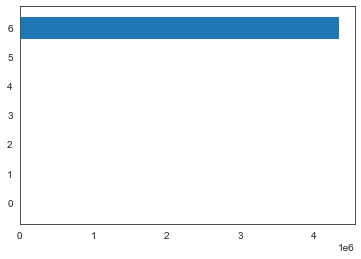

In [42]:
plt.barh(test.WEEKDAY,test.Daily_fixed);